# `magplots` Examples

In [1]:
# # Install if needed:
# pip install magplots

# from magplots.magFunctions import * # packaged version
from magFunctions import * # local version
import numpy as np
import datetime

/home/pliny/.local/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### `fill_nan()`: Fits a linear regression to NaN values in a vector.

In [2]:
y = np.array([40, 41, np.nan, 43, np.nan, 41])
fill_nan(y)

array([40.        , 41.        , 41.18644068, 43.        , 41.69491525,
       41.        ])

### `reject_outliers()`: Replaces outliers with NaN. (Used to eliminate power cycling artifacts.)

In [3]:
help(reject_outliers)

Help on function reject_outliers in module magFunctions:

reject_outliers(y)
    Function to reject outliers from a 1D dataset.
    
    Arguments:
        y      : 1D numpy array
    
    Returns:
        array with outliers replaced with NaN



In [4]:
reject_outliers(np.append(y, [-51e100, 41, 2, 45], axis=0))

array([40.        , 41.        , 41.18644068, 43.        , 41.69491525,
       41.        ,         nan, 41.        ,  2.        , 45.        ])

###  `magfetch()`: Pulls magnetometer data.

In [5]:
magfetch(start = datetime.datetime(2016, 6, 24, 0, 0, 0), end = datetime.datetime(2016, 6, 25, 0, 0, 0), 
    magname = 'pg1', 
    resolution = '1sec', 
    is_verbose = True
)

100% [..........................................................................] 8211855 / 8211855
Data for pg1 collected: 86400 samples.


{'UT': array([datetime.datetime(2016, 6, 24, 0, 0, 0, 1000),
        datetime.datetime(2016, 6, 24, 0, 0, 1, 1000),
        datetime.datetime(2016, 6, 24, 0, 0, 2, 1000), ...,
        datetime.datetime(2016, 6, 24, 23, 59, 57, 1000),
        datetime.datetime(2016, 6, 24, 23, 59, 58, 1000),
        datetime.datetime(2016, 6, 24, 23, 59, 59, 1000)], dtype=object),
 'UT_1': array([1.46673e+09, 1.46673e+09, 1.46673e+09, ..., 1.46681e+09,
        1.46681e+09, 1.46681e+09]),
 'MAGNETIC_NORTH_-_H': array([-59.83, -59.7 , -59.83, ..., -18.47, -18.21, -17.84]),
 'MAGNETIC_EAST_-_E': array([-506.35, -506.6 , -506.98, ..., -550.37, -551.  , -551.63]),
 'VERTICAL_DOWN_-_Z': array([-218.2 , -217.82, -217.44, ..., -302.06, -301.81, -301.68])}

###  `magfetchtgo`: Called by `magfetch` for Arctic magnetometers. Pulls data from the Tromsø Geophysical Observatory. Requires a password.
Save the password locally in the file tgopw.txt.

In [12]:
magfetch(is_verbose=False)


  Check your parameters and verify magnetometer coverage at https://flux.phys.uit.no/coverage/indexDTU.html.


{'UT': array([datetime.datetime(2016, 1, 24, 0, 0),
        datetime.datetime(2016, 1, 24, 0, 0, 10),
        datetime.datetime(2016, 1, 24, 0, 0, 20), ...,
        datetime.datetime(2016, 1, 24, 23, 59, 40),
        datetime.datetime(2016, 1, 24, 23, 59, 50),
        datetime.datetime(2016, 1, 25, 0, 0)], dtype=object),
 'MAGNETIC_NORTH_-_H': array([999.9999, 999.9999, 999.9999, ..., 999.9999, 999.9999, 999.9999]),
 'MAGNETIC_EAST_-_E': array([99999.9, 99999.9, 99999.9, ..., 99999.9, 99999.9, 99999.9]),
 'VERTICAL_DOWN_-_Z': array([99999.9, 99999.9, 99999.9, ..., 99999.9, 99999.9, 99999.9])}

In [7]:
help(magfetch)

Help on function magfetch in module magFunctions:

magfetch(start=datetime.datetime(2016, 1, 24, 0, 0), end=datetime.datetime(2016, 1, 25, 0, 0), magname='atu', is_verbose=False, tgopw='', resolution='10sec')
    MAGFETCH 
        Function to fetch data for a given magnetometer. Pulls from ai.cdas or DTU.
    
        Arguments:
            start, end   : datetimes of the start and end of sampled data range.
            magname      : IAGA ID for magnetometer being sampled. e.g.: 'upn'
            is_verbose   : Boolean for whether debugging text is printed.
            tgopw        : Password for Tromsø Geophysical Observatory
            resolution   : Data resolution for TGO data.
    
        Returns:
            df           : pandas dataframe with columns ['UT', 'MAGNETIC_NORTH_-_H', 'MAGNETIC_EAST_-_E', 'VERTICAL_DOWN_-_Z']



###  `magdf()`: Function to create multi-indexable dataframe of all mag parameters for a given period of time. 
It can save .csv files as well. If `is_saved==True`, make sure you have a folder named `/output`. 
It will check to see if you have already generated a file before recreating it, but only if `is_saved==True`.

In [8]:
df = magdf(is_verbose = True, is_saved = True)

Looks like output/2016-01-24 00:00:00_.csv has already been generated. Pulling data...


###  `magfig()`: Function to create time domain plots of conjugate magnetometers.

Plotting data for 6 magnetometers: 2016-01-24 00:00:00
Plotting data for Arctic magnetometer #1: UPN
  Check your parameters and verify magnetometer coverage at https://flux.phys.uit.no/coverage/indexDTU.html.
Plotting data for Antarctic magnetometer #1: PG0
100% [..........................................................................] 8212030 / 8212030
Plotting data for Arctic magnetometer #2: UMQ
  Check your parameters and verify magnetometer coverage at https://flux.phys.uit.no/coverage/indexDTU.html.
Plotting data for Antarctic magnetometer #2: PG1
100% [..........................................................................] 8211855 / 8211855
Plotting data for Arctic magnetometer #3: GDH
Plotting data for Antarctic magnetometer #3: PG2
100% [..........................................................................] 8211999 / 8211999
Plotting data for Arctic magnetometer #4: ATU
  Check your parameters and verify magnetometer coverage at https://flux.phys.uit.no/coverage/in

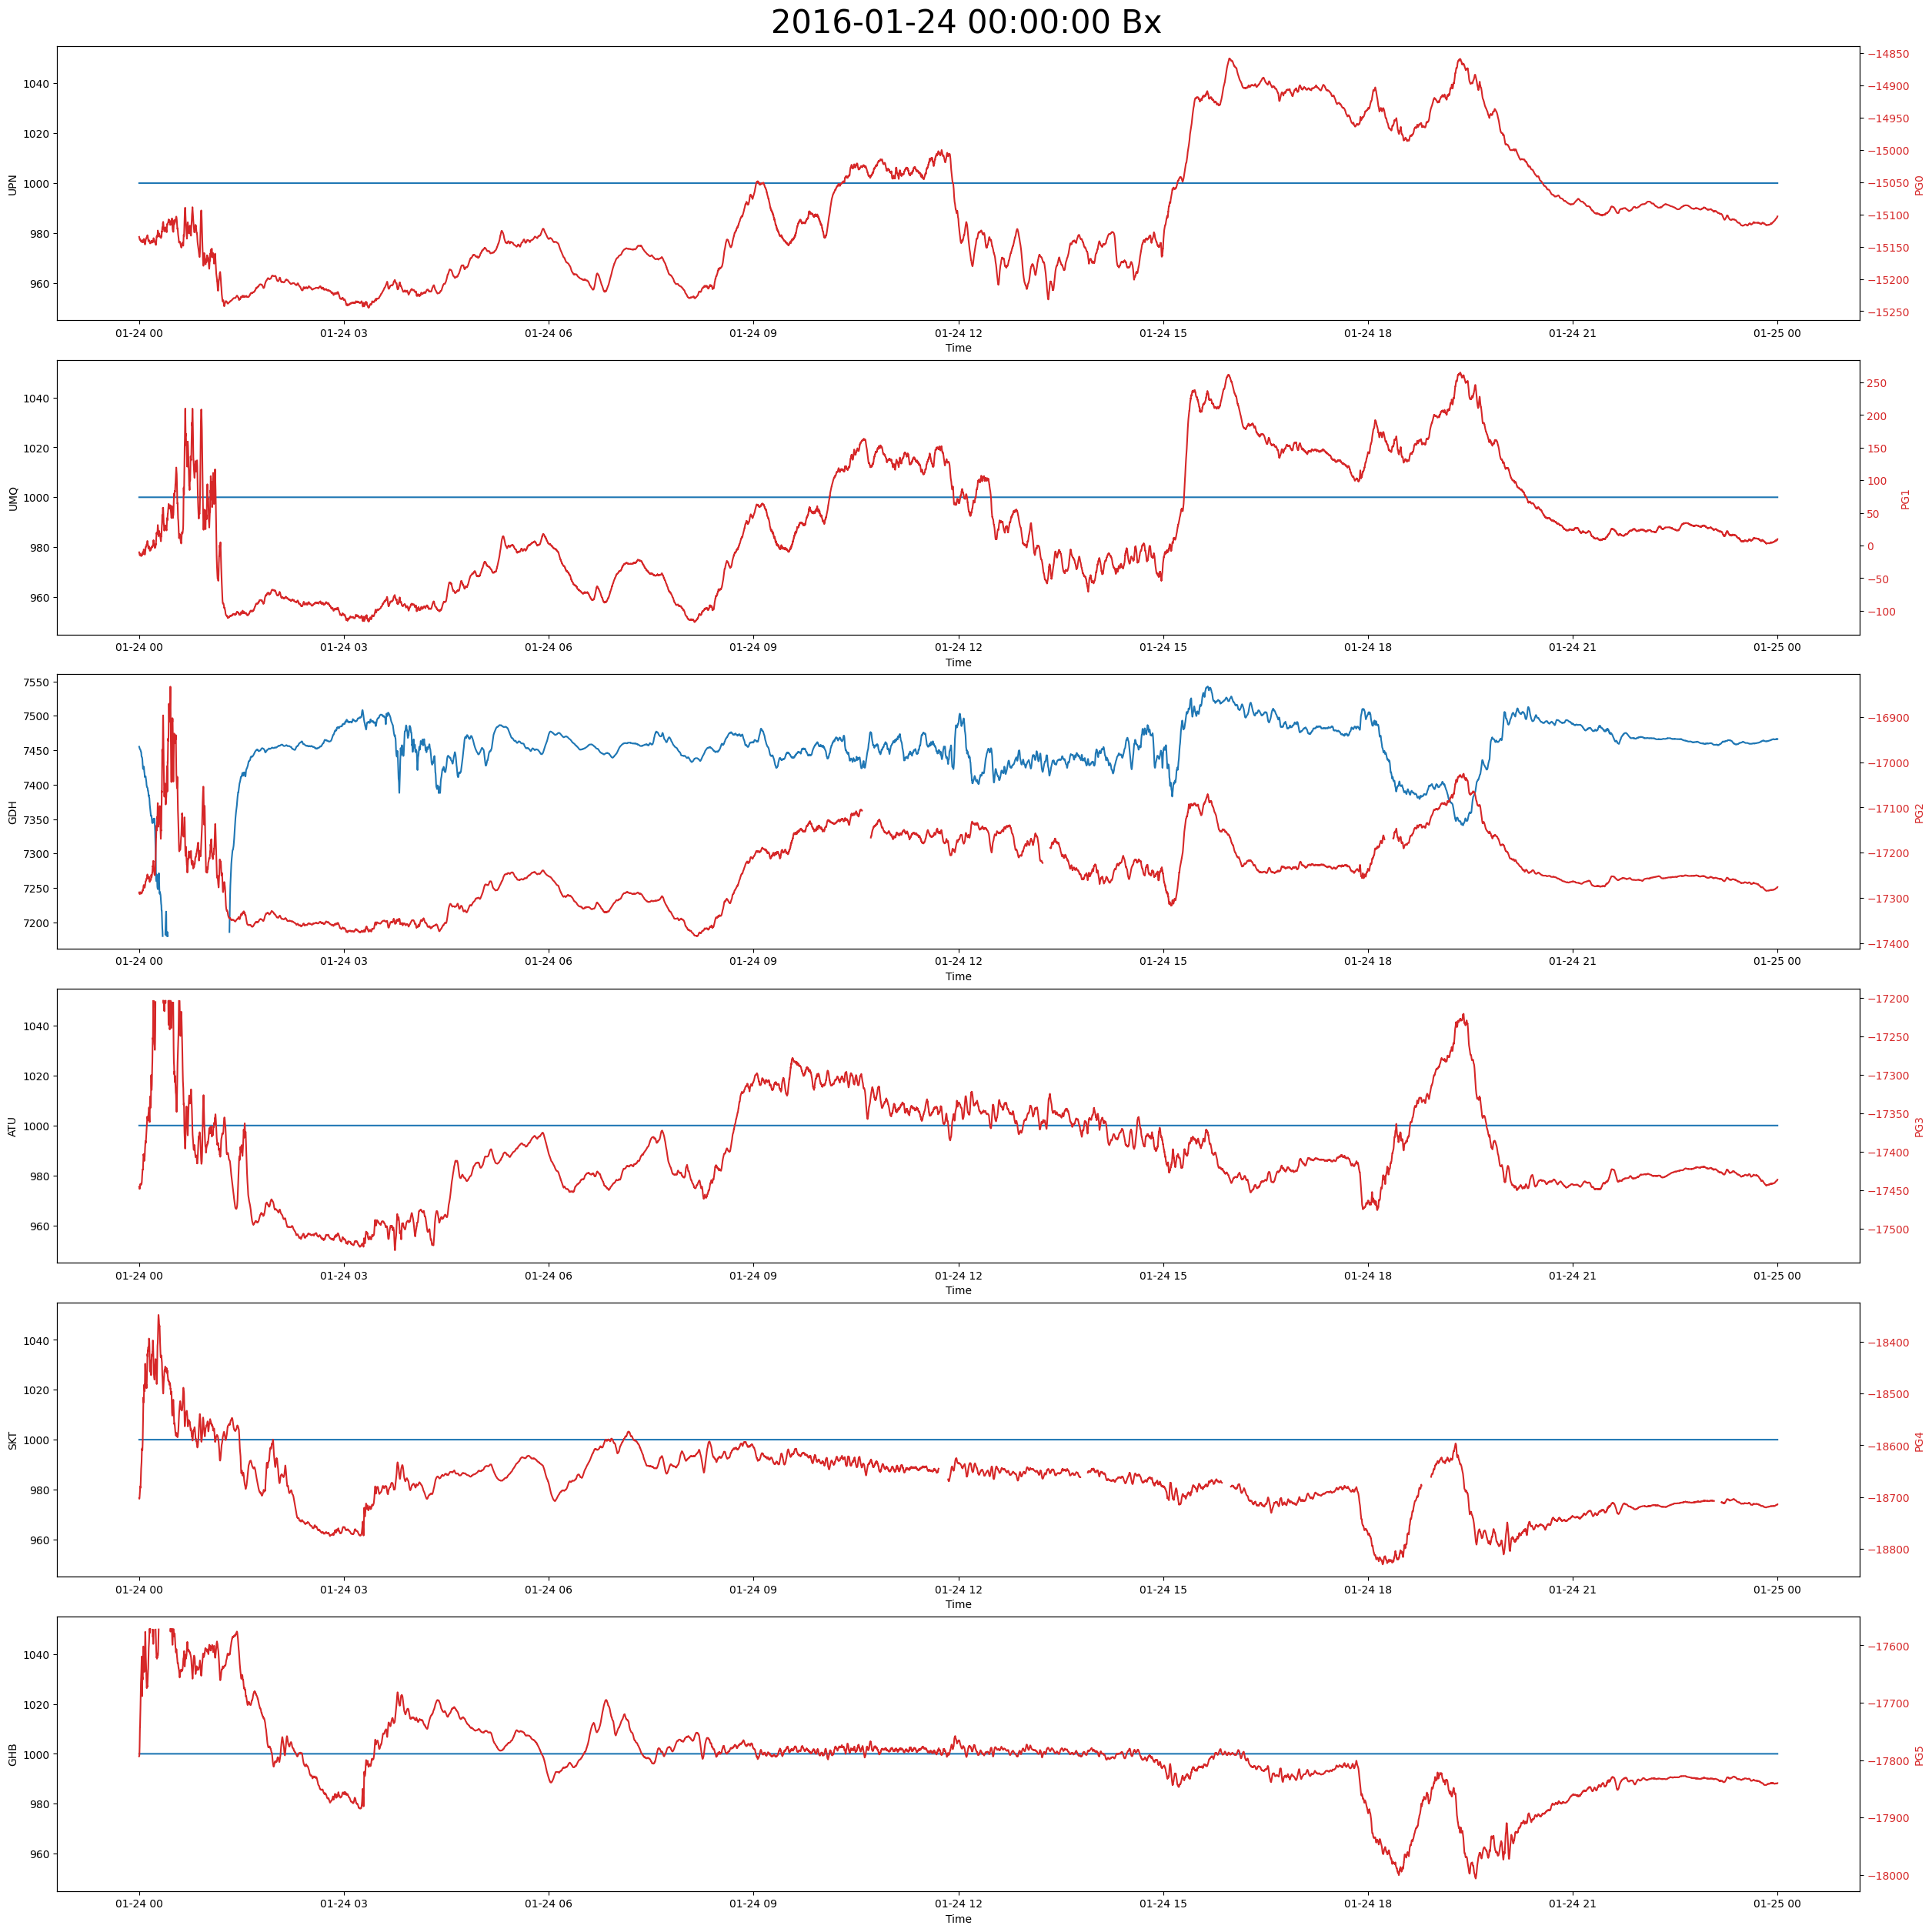

In [9]:
start = datetime.datetime(2016, 1, 24, 0, 0, 0)
end = datetime.datetime(2016, 1, 25, 0, 0, 0) 
magfig(start=start, end=end, is_verbose = False)

Plotting data for 6 magnetometers: 2016-01-24 00:00:00
Plotting data for Arctic magnetometer #1: UPN
  Check your parameters and verify magnetometer coverage at https://flux.phys.uit.no/coverage/indexDTU.html.
Plotting data for Arctic magnetometer #2: UMQ
  Check your parameters and verify magnetometer coverage at https://flux.phys.uit.no/coverage/indexDTU.html.
Plotting data for Arctic magnetometer #3: GDH
Plotting data for Arctic magnetometer #4: ATU
  Check your parameters and verify magnetometer coverage at https://flux.phys.uit.no/coverage/indexDTU.html.
Plotting data for Arctic magnetometer #5: SKT
  Check your parameters and verify magnetometer coverage at https://flux.phys.uit.no/coverage/indexDTU.html.
Plotting data for Arctic magnetometer #6: GHB
  Check your parameters and verify magnetometer coverage at https://flux.phys.uit.no/coverage/indexDTU.html.
Plotting data for Antarctic magnetometer #1: PG0
100% [.....................................................................

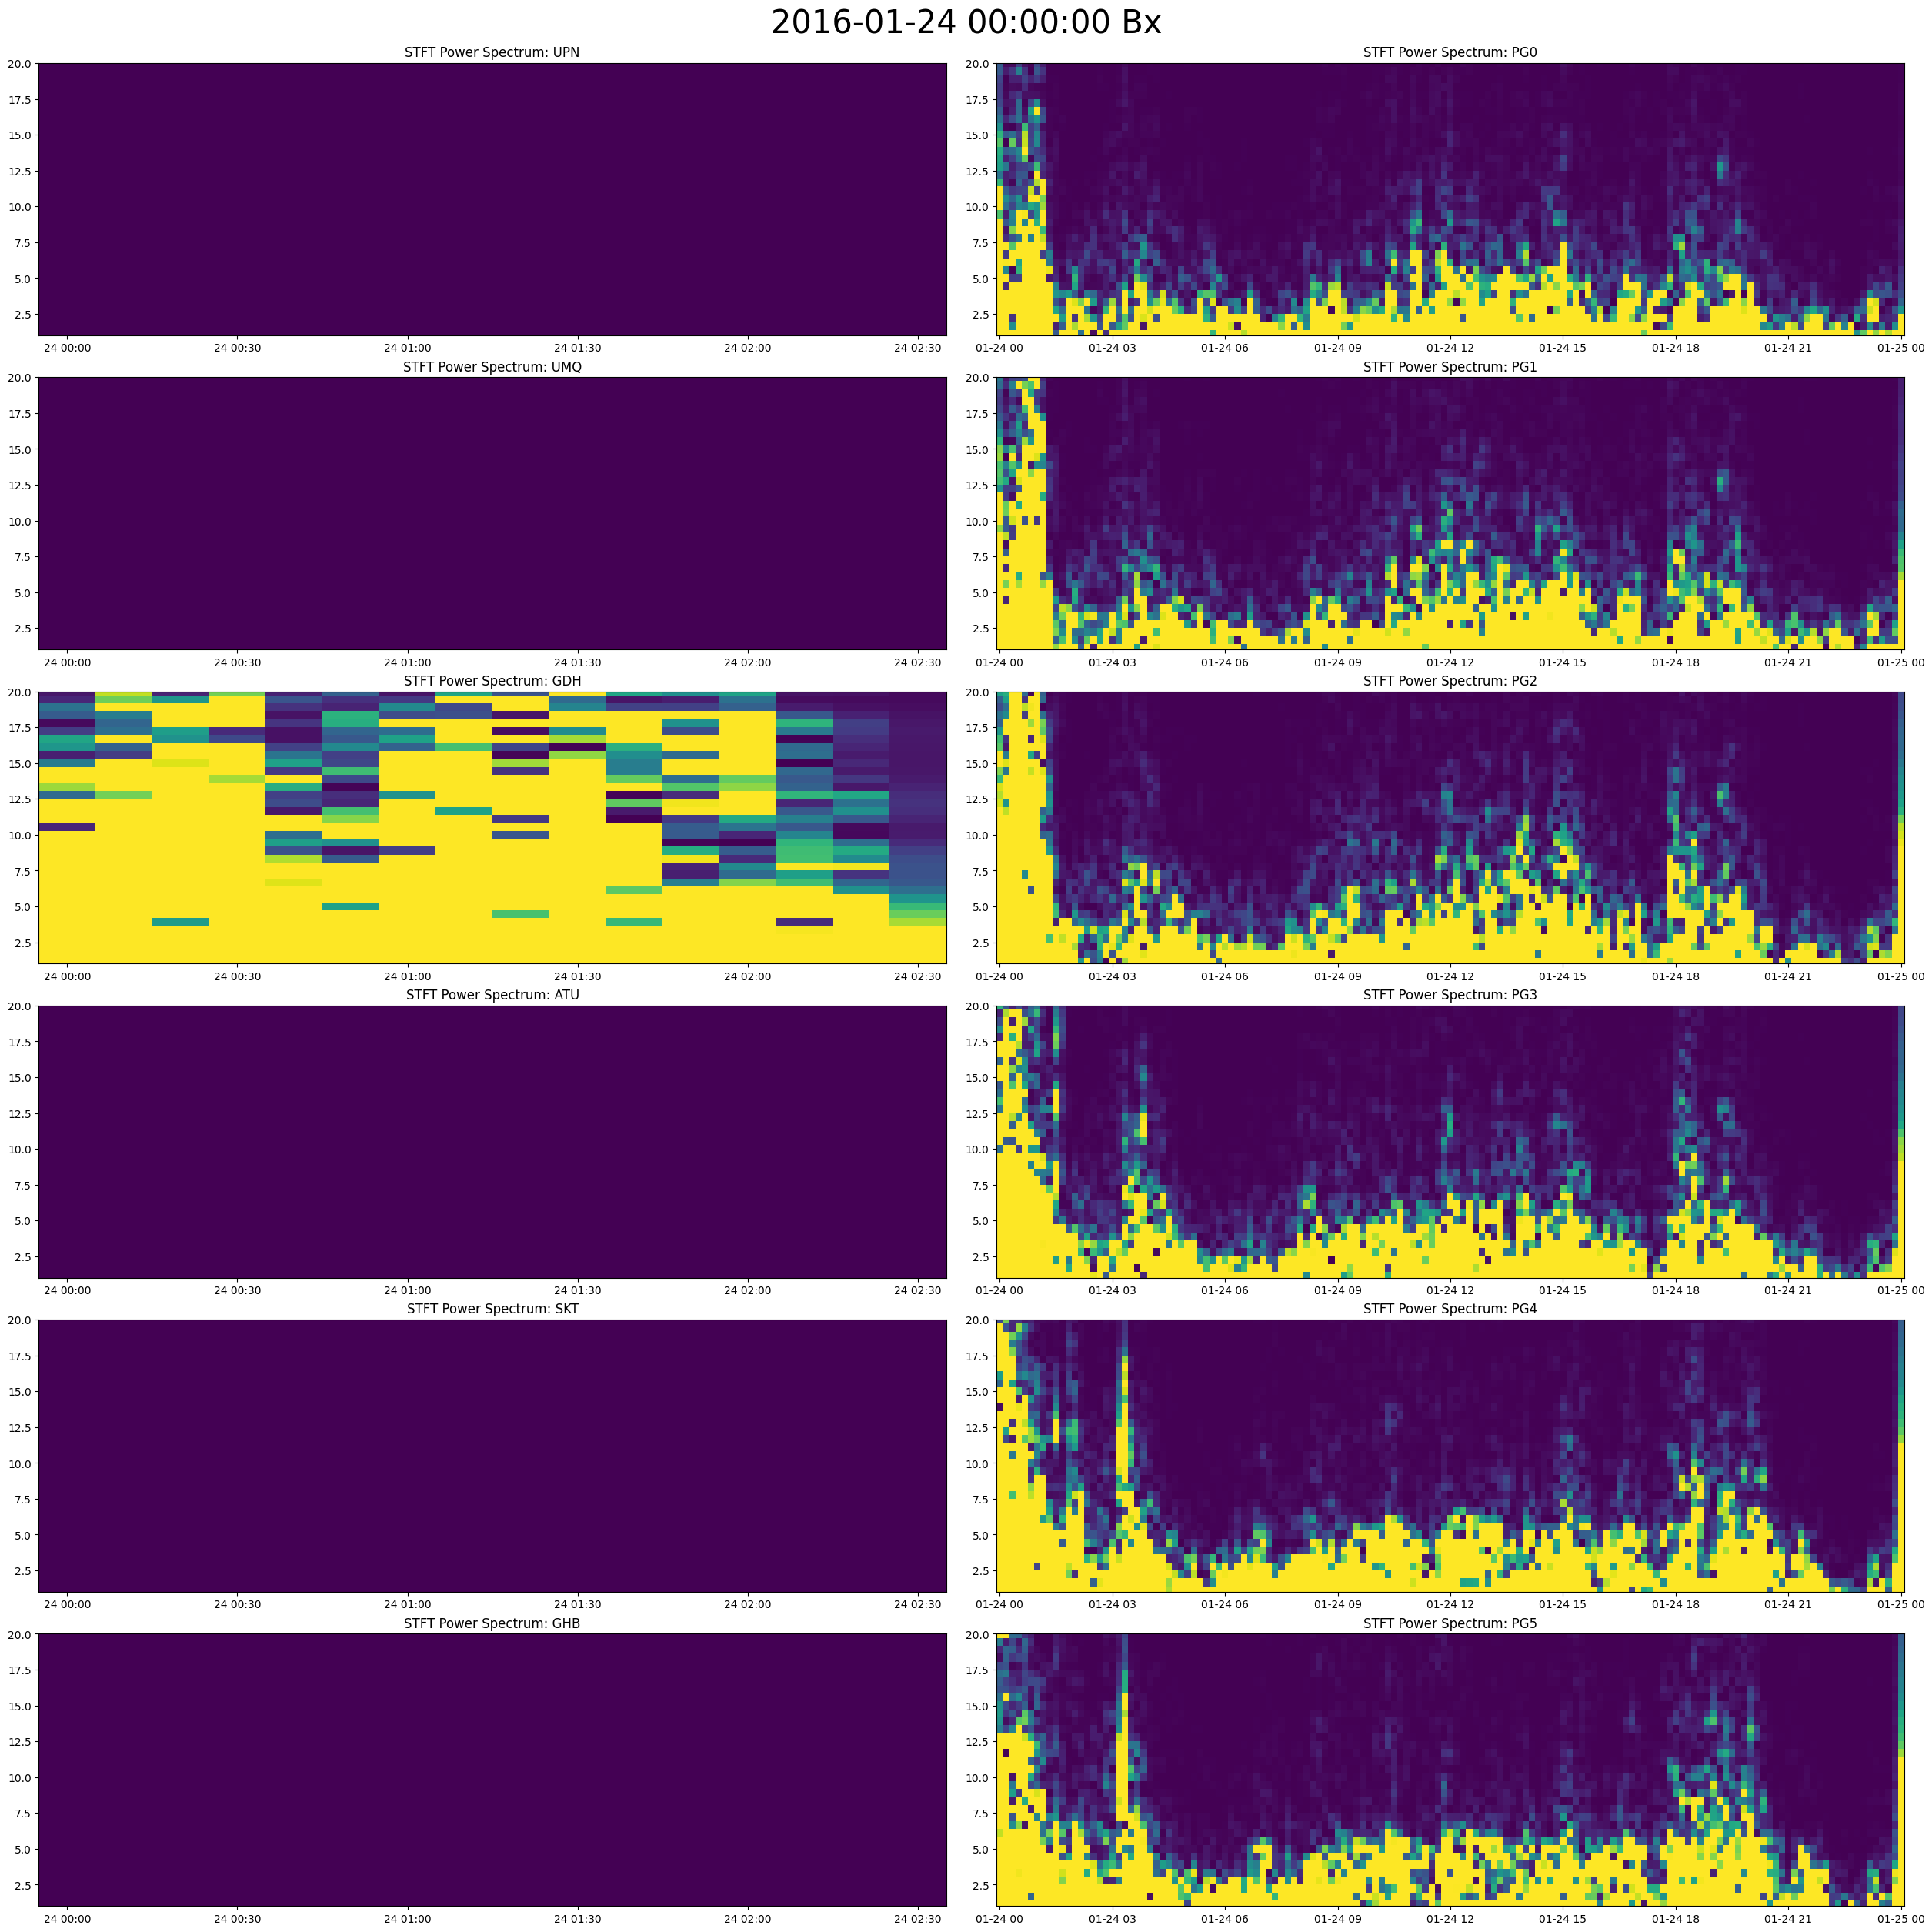

In [14]:
magspect(start=start, end=end, is_verbose = False)

###  `wavepwr()`: Function to calculate wave power within a frequency range over a given period of time.
By default, this function defines the range of interest for Pc5 waves as 2.5-3 mHz. However, we note that the bounds of the Pc5 range vary considerably in the literature. 

In [13]:
wavepwr('pg4', parameter = 'Bx', start = start, end = end, is_verbose=True)

Checking wave power for magnetometer PG4 between 2016-01-24 00:00:00 and 2016-01-25 00:00:00.
100% [..........................................................................] 8212011 / 8212011
[]
PG4: The estimated power from 2.5 mHz to 3 mHz is 4.8374716888687095 nT/Hz^(1/2)


4.8374716888687095